In [51]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import pandas as pd

df = pd.read_csv('pokemon_alopez247.csv')
df

Number        Name   Type_1  Type_2  Total   HP  Attack  Defense  Sp_Atk  \
0         1   Bulbasaur    Grass  Poison    318   45      49       49      65   
1         2     Ivysaur    Grass  Poison    405   60      62       63      80   
2         3    Venusaur    Grass  Poison    525   80      82       83     100   
3         4  Charmander     Fire     NaN    309   39      52       43      60   
4         5  Charmeleon     Fire     NaN    405   58      64       58      80   
..      ...         ...      ...     ...    ...  ...     ...      ...     ...   
716     717     Yveltal     Dark  Flying    680  126     131       95     131   
717     718     Zygarde   Dragon  Ground    600  108     100      121      81   
718     719     Diancie     Rock   Fairy    600   50     100      150     100   
719     720       Hoopa  Psychic   Ghost    600   80     110       60     150   
720     721   Volcanion     Fire   Water    600   80     110      120     130   

     Sp_Def  ...   Color  hasGender  Pr_Male   Egg_Group_1  Egg_Group_2  \
0        65  ...   Green       True    0.875       Monster        Grass   
1        80  ...   Green       True    0.875       Monster        Grass   
2       100  ...   Green       True    0.875       Monster        Grass   
3        50  ...     Red       True    0.875       Monster       Dragon   
4        65  ...     Red       True    0.875       Monster       Dragon   
..      ...  ...     ...        ...      ...           ...          ...   
716      98  ...     Red      False      NaN  Undiscovered          NaN   
717      95  ...   Green      False      NaN  Undiscovered          NaN   
718     150  ...    Pink      False      NaN  Undiscovered          NaN   
719     130  ...  Purple      False      NaN  Undiscovered          NaN   
720      90  ...   Brown      False      NaN  Undiscovered          NaN   

     hasMegaEvolution Height_m Weight_kg  Catch_Rate       Body_Style  
0               False     0.71       6.9          45        quadruped  
1               False     0.99      13.0          45        quadruped  
2                True     2.01     100.0          45        quadruped  
3               False     0.61       8.5          45   bipedal_tailed  
4               False     1.09      19.0          45   bipedal_tailed  
..                ...      ...       ...         ...              ...  
716             False     5.79     203.0          45        two_wings  
717             False     5.00     305.0           3  serpentine_body  
718              True     0.71       8.8           3        head_arms  
719             False     0.51       9.0           3        head_only  
720             False     1.70     195.0           3        quadruped  

[721 rows x 23 columns]

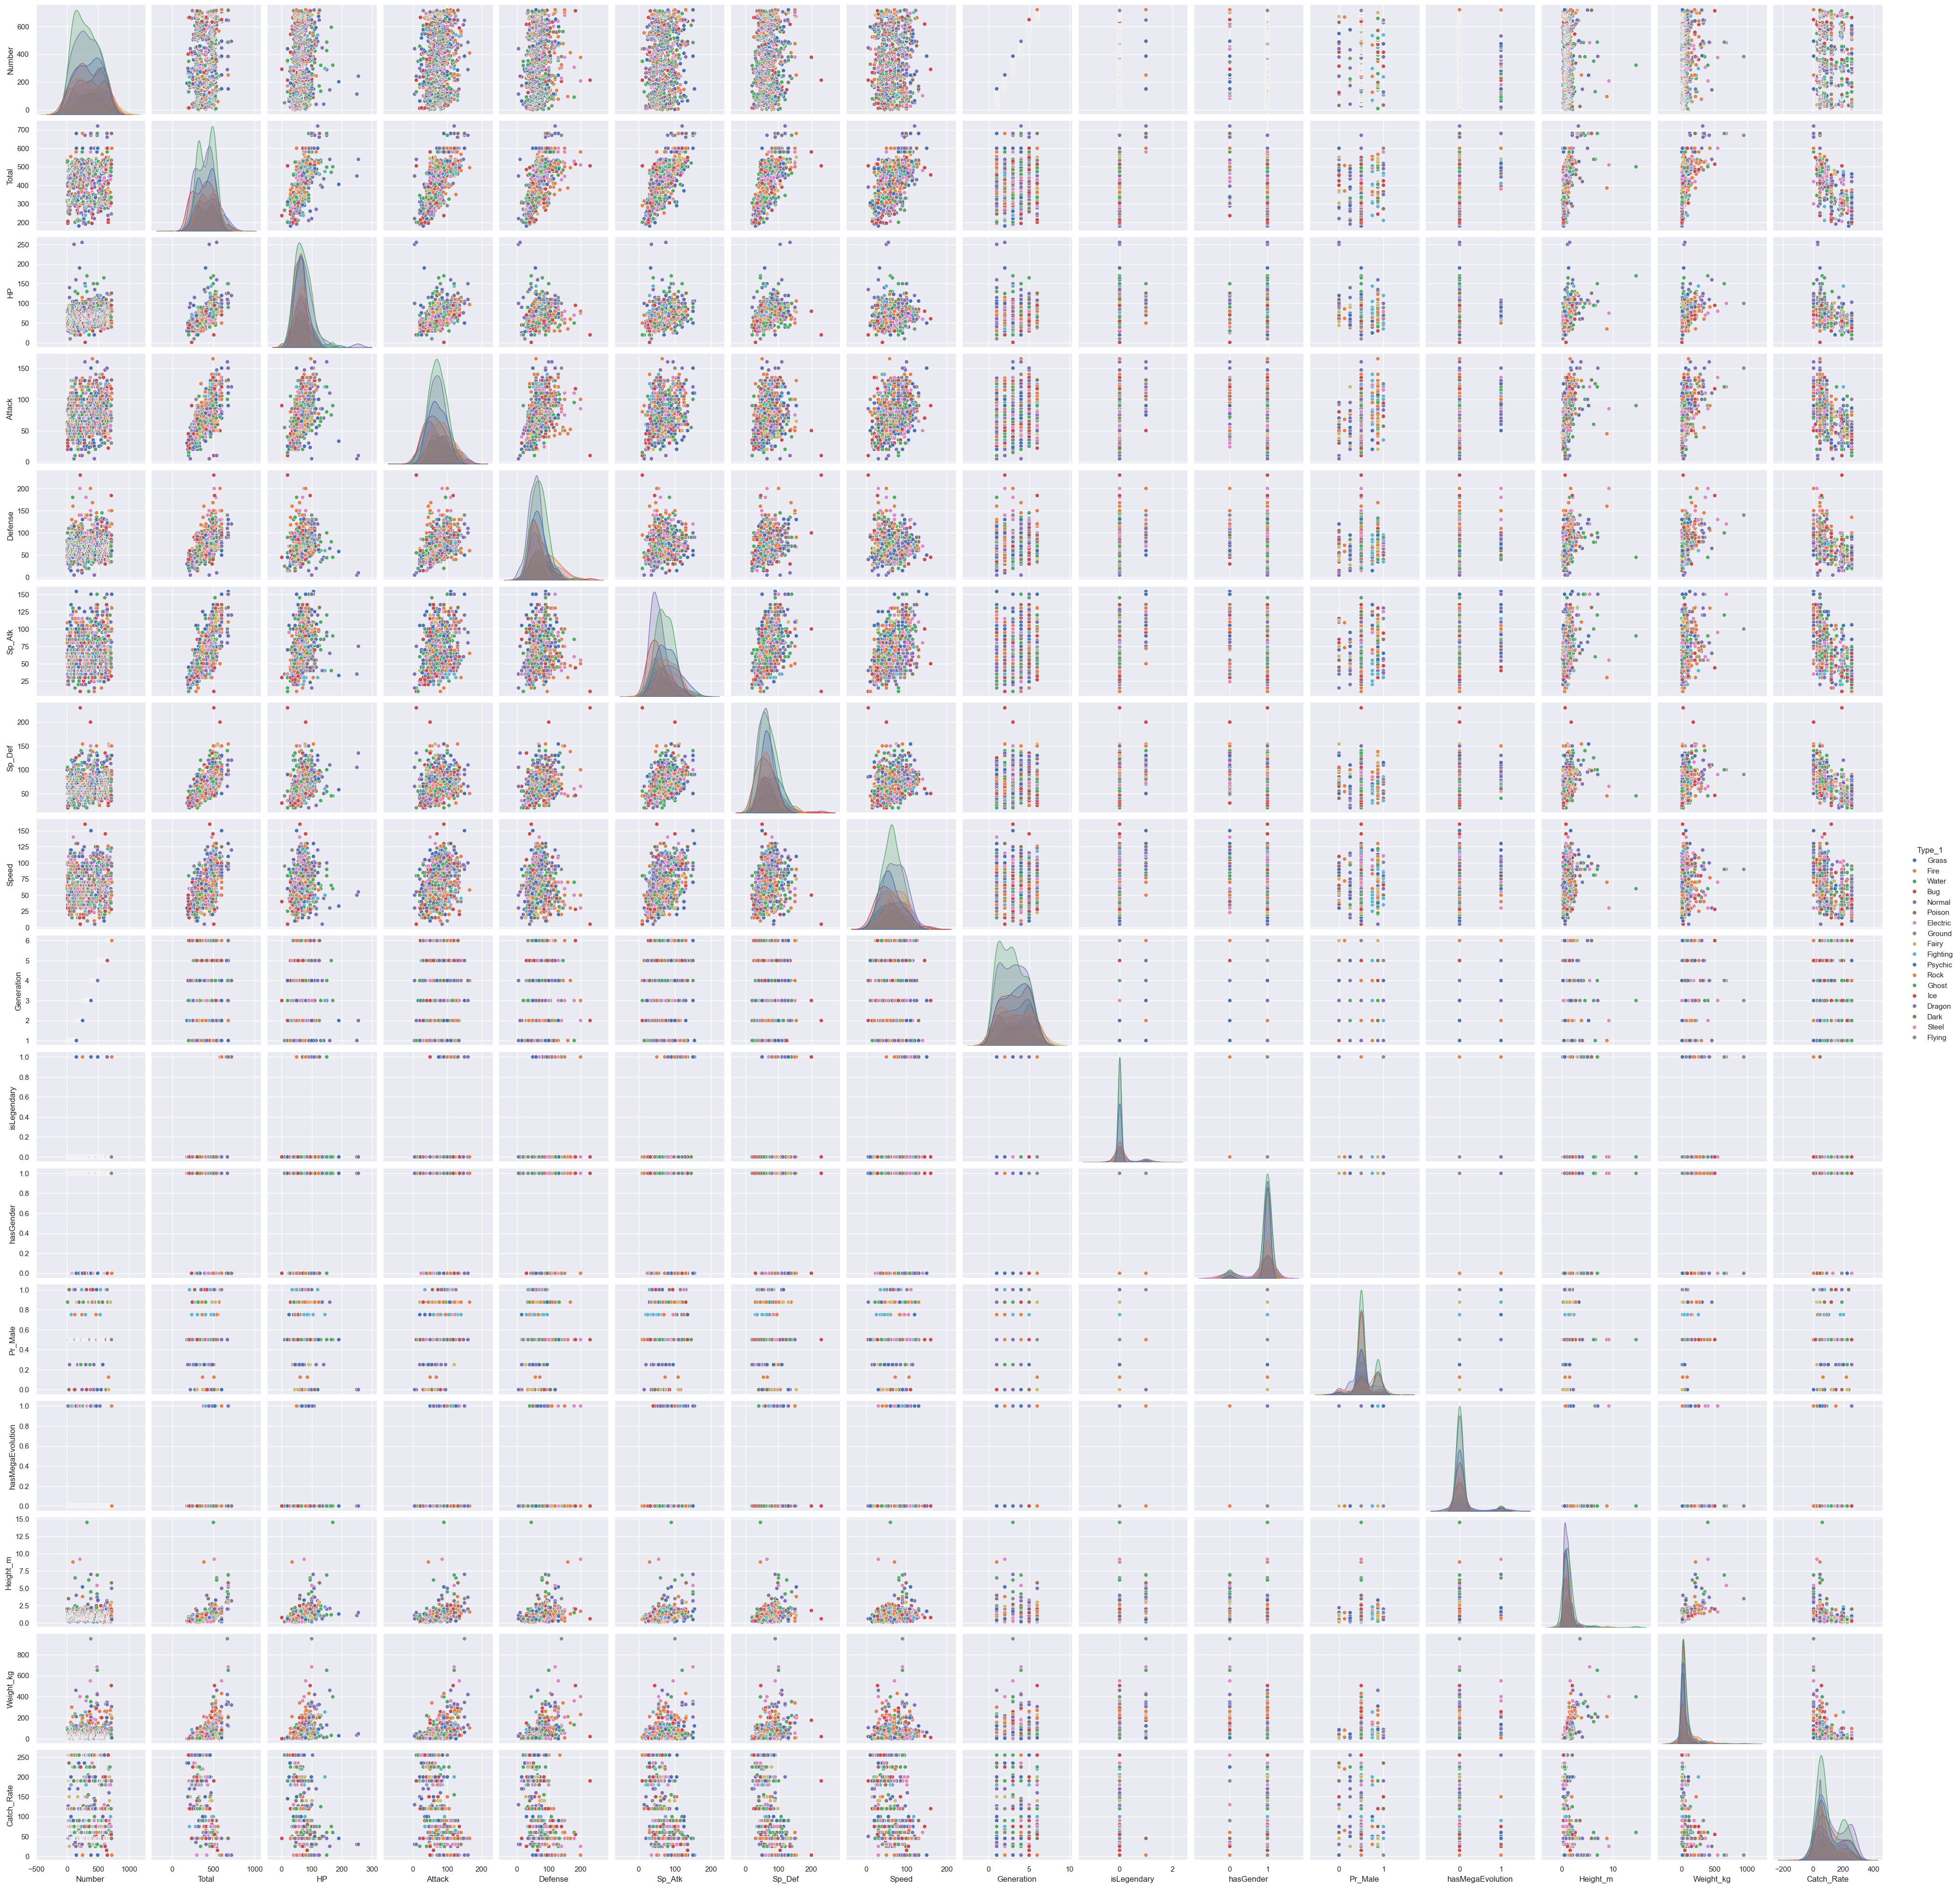

In [40]:
sns.pairplot(df, hue='Type_1', palette="deep")

<Axes: >

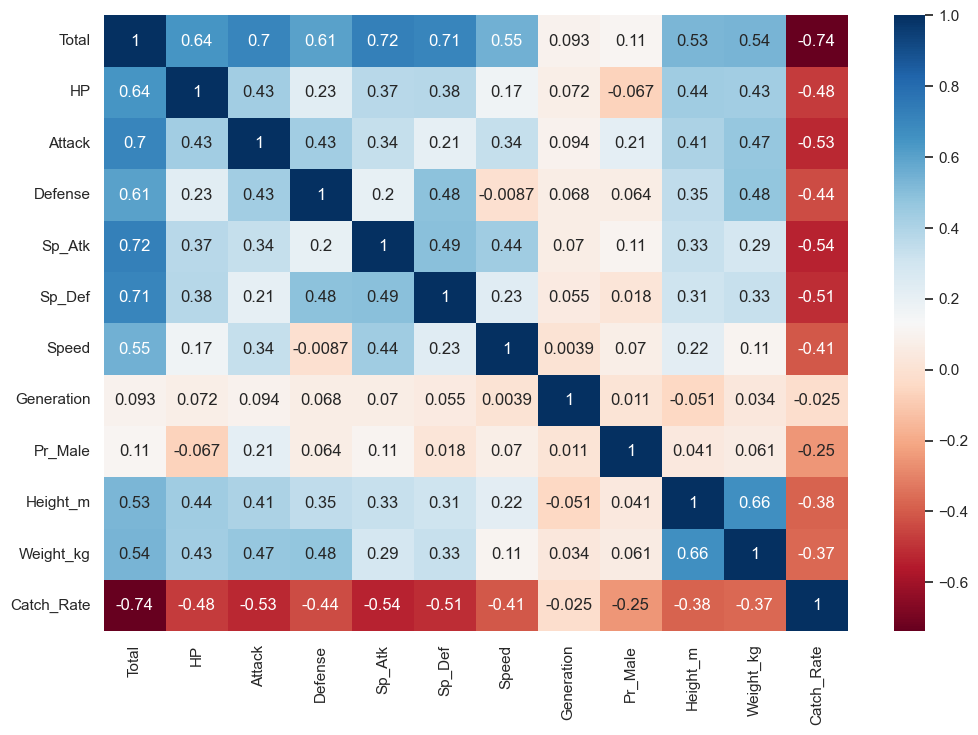

In [41]:
# gráfico de correlação baseados nos atributos físicos dos Pokémon
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df.iloc[:,[4,5,6,7,8,9,10,11,15,19,20,21]].corr(), annot=True, cmap='RdBu') # 

In [42]:
padronizado = StandardScaler()

entrada_padronizada = padronizado.fit_transform(df.iloc[:,[4,5,6,7,8,9,10]])


pca = PCA(n_components=2)
duas_dimensoes = pca.fit_transform(df.iloc[:,[4,5,6,7,8,9,10]])



In [43]:
tipo = df.Type_1

encoder = LabelEncoder()
tipo = encoder.fit_transform(tipo)

tipo

array([ 9,  9,  9,  6,  6,  6, 17, 17, 17,  0,  0,  0,  0,  0,  0, 12, 12,
       12, 12, 12, 12, 12, 13, 13,  3,  3, 10, 10, 13, 13, 13, 13, 13, 13,
        4,  4,  6,  6, 12, 12, 13, 13,  9,  9,  9,  0,  0,  0,  0, 10, 10,
       12, 12, 17, 17,  5,  5,  6,  6, 17, 17, 17, 14, 14, 14,  5,  5,  5,
        9,  9,  9, 17, 17, 15, 15, 15,  6,  6, 17, 17,  3,  3, 12, 12, 12,
       17, 17, 13, 13, 17, 17,  8,  8,  8, 15, 14, 14, 17, 17,  3,  3,  9,
        9, 10, 10,  5,  5, 12, 13, 13, 10, 10, 12,  9, 12, 17, 17, 17, 17,
       17, 17, 14,  0, 11,  3,  6,  0, 12, 17, 17, 17, 12, 12, 17,  3,  6,
       12, 15, 15, 15, 15, 15, 12, 11,  3,  6,  2,  2,  2, 14, 14,  9,  9,
        9,  6,  6,  6, 17, 17, 17, 12, 12, 12, 12,  0,  0,  0,  0, 13, 17,
       17,  3,  4, 12,  4,  4, 14, 14,  3,  3,  3,  9, 17, 17, 15, 17,  9,
        9,  9, 12,  9,  9,  0, 17, 17, 14,  1,  1, 17,  8, 14, 14, 12,  0,
        0, 12, 10, 16,  4,  4, 17,  0,  0,  0,  1, 12, 12,  6,  6, 11, 11,
       17, 17, 17, 11, 17

Text(0, 0.5, 'inertia')

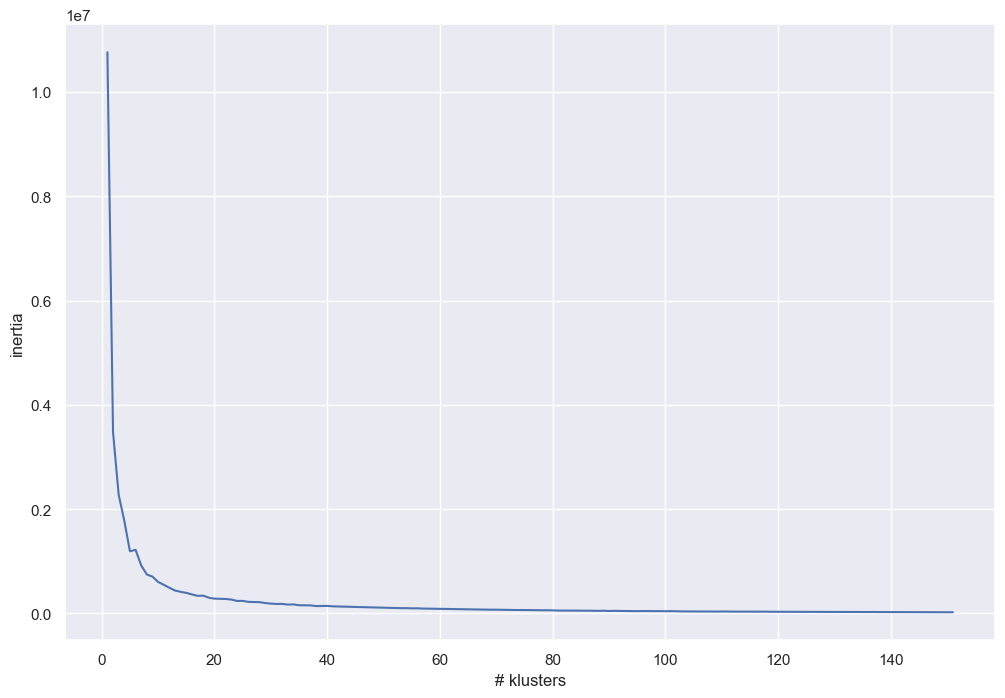

In [44]:
inertia=[]
for i in range(1,152):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(duas_dimensoes)
    inertia.append(kmeans.inertia_)

plt.plot(list(range(1,152)), inertia)
plt.xlabel("# klusters")
plt.ylabel("inertia")

Text(0.5, 1.0, 'Dataset real')

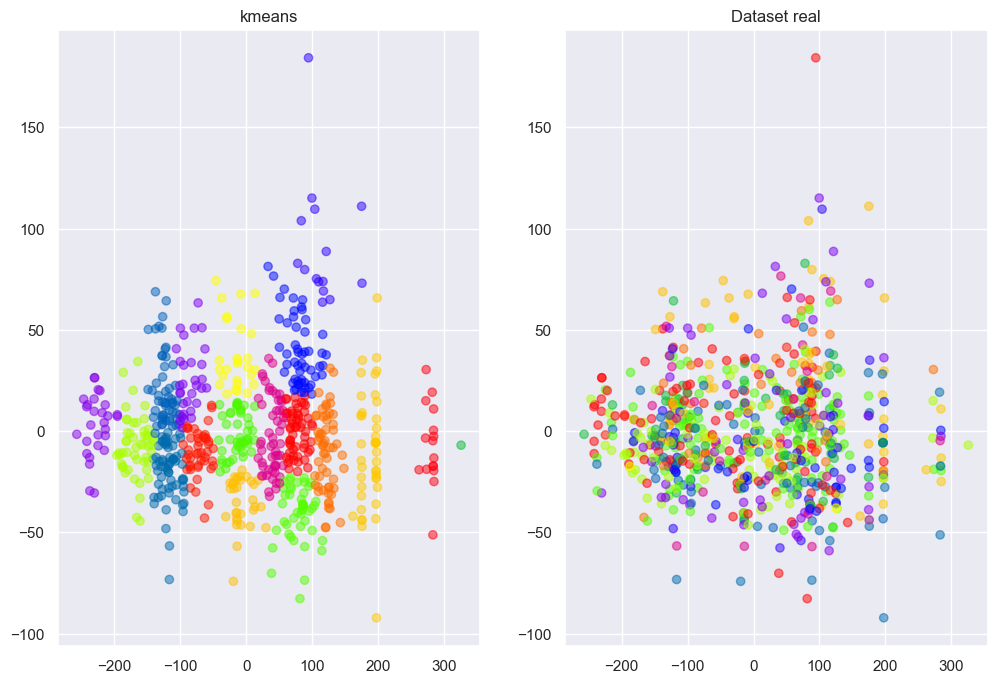

In [45]:
kmeans = KMeans(n_clusters=18, n_init='auto')
kmeans.fit(duas_dimensoes)
solucao = kmeans.predict(duas_dimensoes)

plt.subplot(1,2,1)
plt.scatter(duas_dimensoes[:,0], duas_dimensoes[:,1],
            c=solucao, alpha=0.5, cmap='prism')
plt.title("kmeans")

plt.subplot(1,2,2)
plt.scatter(duas_dimensoes[:,0], duas_dimensoes[:,1], c=tipo, alpha=0.5, cmap='prism') # arrumar para tipos
plt.title("Dataset real")

Sem PCA

In [46]:
padronizado = StandardScaler()

entrada_padronizada = padronizado.fit_transform(df.iloc[:,[4,5,6,7,8,9,10]])

duas_dimensoes = padronizado.fit_transform(df.iloc[:,[4,5,6,7,8,9,10]])

Text(0, 0.5, 'inertia')

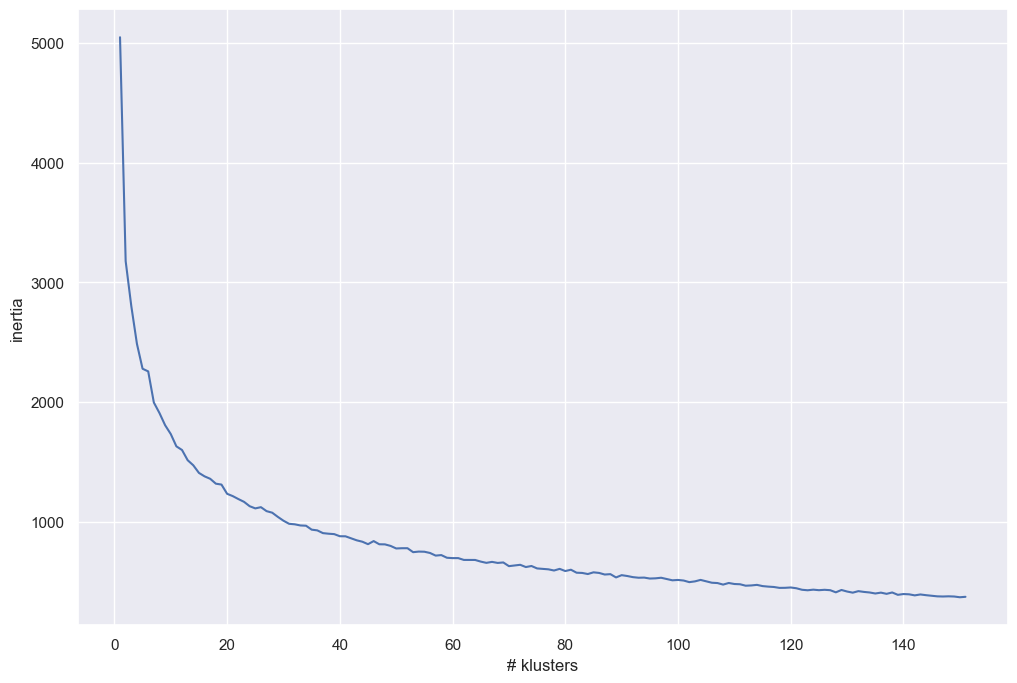

In [52]:
inertia=[]
for i in range(1,152):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(duas_dimensoes)
    inertia.append(kmeans.inertia_)

plt.plot(list(range(1,152)), inertia)
plt.xlabel("# klusters")
plt.ylabel("inertia")

Text(0.5, 1.0, 'Dataset real')

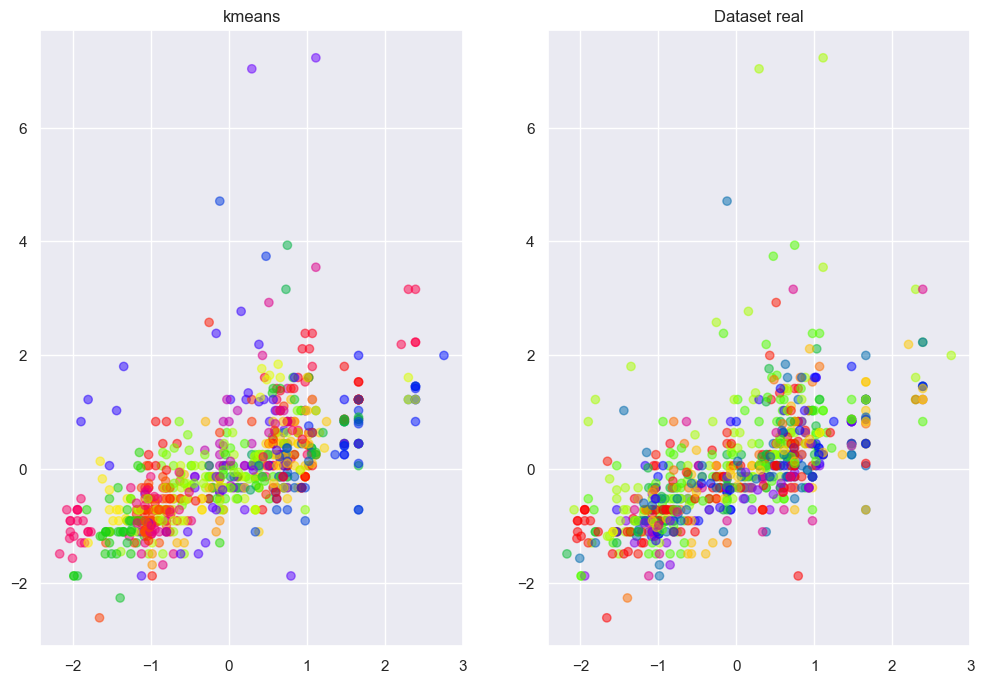

In [53]:
kmeans = KMeans(n_clusters=75, n_init='auto')
kmeans.fit(duas_dimensoes)
solucao = kmeans.predict(duas_dimensoes)

plt.subplot(1,2,1)
plt.scatter(duas_dimensoes[:,0], duas_dimensoes[:,1],
            c=solucao, alpha=0.5, cmap='prism')
plt.title("kmeans")

plt.subplot(1,2,2)
plt.scatter(duas_dimensoes[:,0], duas_dimensoes[:,1], c=tipo, alpha=0.5, cmap='prism') # arrumar para tipos
plt.title("Dataset real")